In [5]:
import numpy as np 
from sklearn.ensemble import IsolationForest
from sklearn.datasets import make_blobs, make_moons

import matplotlib.pyplot as plt 

In [2]:
n_samples = 300 
outliers_fraction = 0.15
n_outliers = int(outliers_fraction * n_samples)
n_inliers = n_samples - n_outliers 

In [3]:
algorithms = IsolationForest(contamination=outliers_fraction, random_state=42)

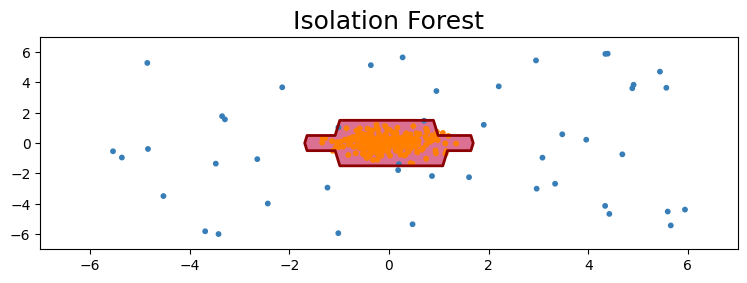

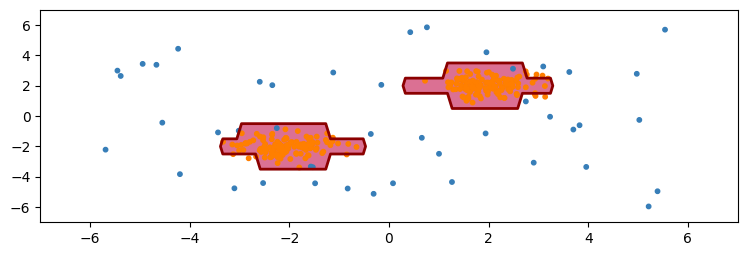

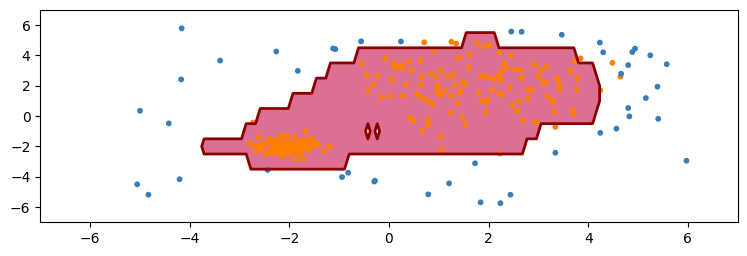

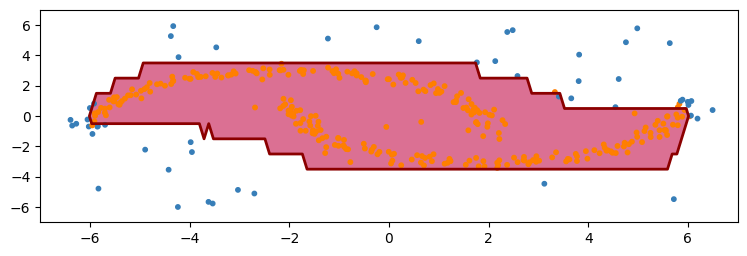

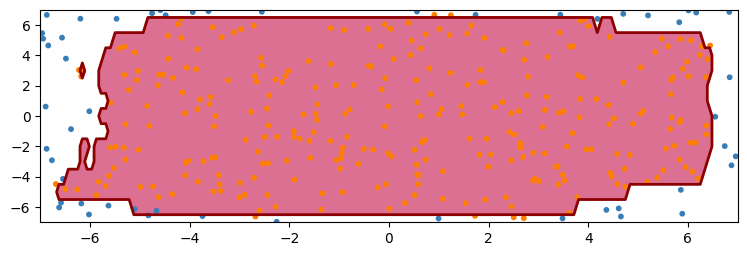

In [23]:
params = {
    'random_state': 0, 
    'n_samples': n_inliers, 
    'n_features': 2
}

datasets = [
    make_blobs(centers=[[0, 0], [0, 0]], cluster_std=0.5, **params)[0], 
    make_blobs(centers=[[2, 2], [-2, -2]], cluster_std=[0.5, 0.5], **params)[0], 
    make_blobs(centers=[[2, 2], [-2, -2]], cluster_std=[1.5, 0.3], **params)[0], 
    4.0 * (make_moons(n_samples=n_samples, noise=0.05, random_state=0)[0] - np.array([0.5, 0.25])), 
    14.0 * (np.random.rand(n_samples, 2) - 0.5)
    ]

xx, yy = np.meshgrid(np.linspace(-7, 7, 150), np.linspace(-7, 7, 15))  # coordinate 

plot_num = 1
for d_idx, d_set in enumerate(datasets):
    X = np.concatenate([d_set, np.random.uniform(low=-6, high=6, size=(n_outliers, 2))], axis=0)
    
    algorithms.fit(X)
    plt.figure(figsize=(9, 16))
    plt.subplot(len(datasets), 1, plot_num)
    
    if d_idx == 0:
        plt.title('Isolation Forest', size=18)
    
    y_pred = algorithms.predict(X)
    
    Z = algorithms.predict(np.c_[xx.ravel(), yy.ravel()]) # concatenate based on columns
    Z = Z.reshape(xx.shape)
    plt.contour(xx, yy, Z, levels=[0], linewidths=2, colors='darkred')
    plt.contourf(xx, yy, Z, levels=[0, Z.max()], colors='palevioletred')
    
    colors = np.array(["#377eb8", "#ff7f00"])
    plt.scatter(X[:, 0], X[:, 1], s=10, color=colors[(y_pred + 1) // 2])
    
    plt.xlim(-7, 7)
    plt.ylim(-7, 7)
    plt.xticks()
    plt.yticks()
    
    plot_num += 1
    
plt.show()